In [ ]:
import pandas as pd
import numpy as nm
from sklearn.model_selection import train_test_split as ttp
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt

In [ ]:
data_true=pd.read_csv("/content/drive/MyDrive/DAP_TEAM 4/hotel review/Balanced_AHR.csv")
data_fake=pd.read_csv("/content/drive/MyDrive/DAP_TEAM 4/hotel review/Big_AHR.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DAP_TEAM 4/hotel review/Balanced_AHR.csv'

In [ ]:
data_true.head(5)

NameError: name 'data_true' is not defined

In [ ]:
data_fake.head(5)

,Unnamed: 0,title,rating,review_text,location,hotel,label
0,0,Excelente y personal amable,5,Un hotel muy bueno. El personal fue muy amabl...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
1,1,Céntrico,4,"Muy buen hotel al nivel de lo esperado, habita...",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
2,2,Hotel excepcional,5,Magnífico hotel. La verdad es que todo perfect...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
3,3,WOW!!,5,"Hotel hermoso, buen diseño, original, limpio. ...",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
4,4,Magnifico,5,Magnífica ubicación en pleno centro de Sevilla...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1


In [ ]:
data_true.shape, data_fake.shape

((7615, 7), (18172, 7))

In [ ]:
data_true["class"]=1
data_fake["class"]=0

In [ ]:
data_true_manual_testing = data_true.tail(10)
valid_indices = data_true.index.tolist()
for i in range(7614, 7604, -1):
    if i in valid_indices:
        data_true.drop([i], axis=0, inplace=True)

data_fake_manual_testing = data_fake.tail(10)
valid_indices = data_fake.index.tolist()
for i in range(7614, 7604, -1):
    if i in valid_indices:
        data_fake.drop([i], axis=0, inplace=True)

In [ ]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")

In [ ]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)

,Unnamed: 0,title,rating,review_text,location,hotel,label,class
0,0,Excelente y personal amable,5,Un hotel muy bueno. El personal fue muy amabl...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
1,1,Céntrico,4,"Muy buen hotel al nivel de lo esperado, habita...",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
2,2,Hotel excepcional,5,Magnífico hotel. La verdad es que todo perfect...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
3,3,WOW!!,5,"Hotel hermoso, buen diseño, original, limpio. ...",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
4,4,Magnifico,5,Magnífica ubicación en pleno centro de Sevilla...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
5,5,Mejor hotel de ciudad en Sevilla,5,Si estás buscando un hotel para alojarte en el...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
6,6,Ubicación y comodidad,4,Gran ubicación y una enorme comodidad. La cama...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
7,7,Muy buena relación calidad-precio,5,"Precioso hotel en pleno centro de Sevilla, ent...",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
8,8,Lo mejor su personal,5,"Como todos los hoteles de la cadena, un 10. Ha...",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0
9,9,HOTEL PRECIOSO,5,Empiezo por lo menos agradable: no es posible ...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1,0


In [ ]:
print(data_merge.groupby(['title'])['review_text'].count())
data_merge.groupby(['title'])['review_text'].count()
plt.show()

title
 A  gem in the middle of malaga                                   4
 Acogedor y limpio                                                1
 Estupendo                                                        2
 Magnífico hotel  muy cuco y céntrico en el realejo de Granada    1
 encantadoras                                                     1
                                                                 ..
👏🏼Sorprendidos!!                                                  2
👏👏 Ubicación, Calidad y Atención                                  2
💢EXCELENTE💢                                                       2
😊👍 Es el IDEAL, Ubicación y comodidad                             1
😘                                                                 2
Name: review_text, Length: 10259, dtype: int64


title
 A  gem in the middle of malaga                                   4
 Acogedor y limpio                                                1
 Estupendo                                                        2
 Magnífico hotel  muy cuco y céntrico en el realejo de Granada    1
 encantadoras                                                     1
                                                                 ..
👏🏼Sorprendidos!!                                                  2
👏👏 Ubicación, Calidad y Atención                                  2
💢EXCELENTE💢                                                       2
😊👍 Es el IDEAL, Ubicación y comodidad                             1
😘                                                                 2
Name: review_text, Length: 10259, dtype: int64
0 = Fake news
1 = True news


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127829 (\N{SLICE OF PIZZA}) missing from current font.
  fig.canv

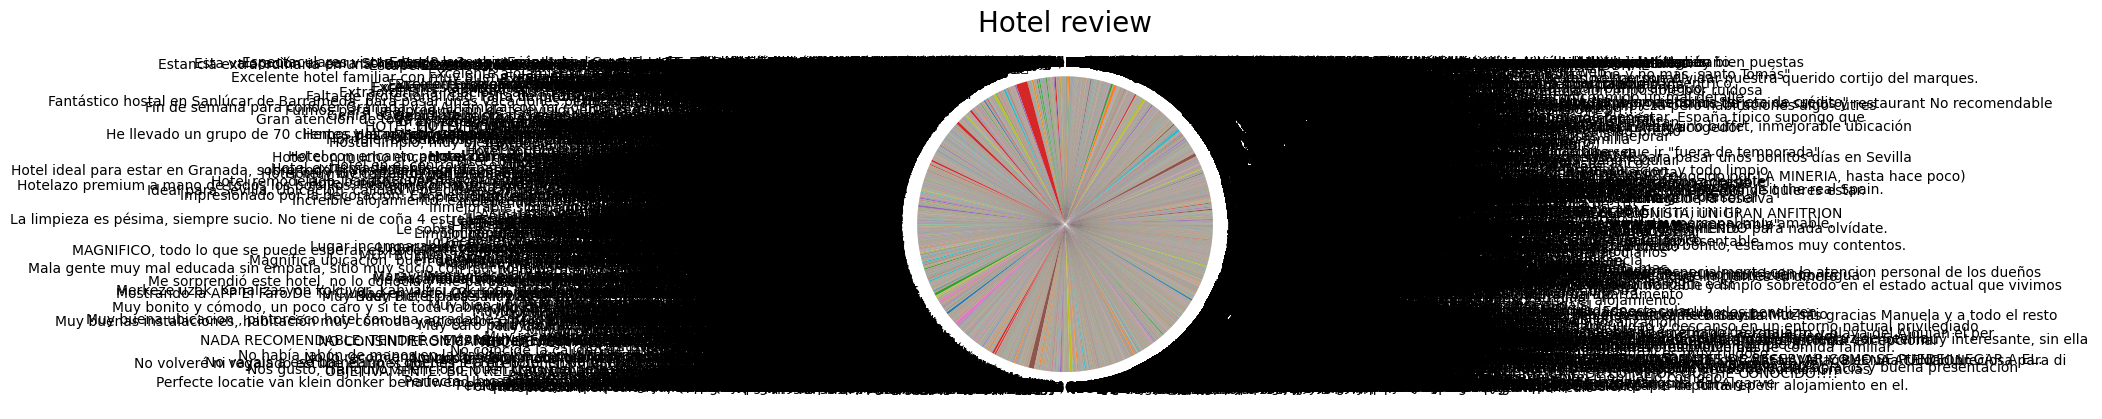

In [ ]:
print(data_merge.groupby(['title'])['review_text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['title'])['review_text'].count().plot(kind="pie")
plt.title("Hotel review",size=20)
plt.show()

In [ ]:
data = data_merge.drop(["Unnamed: 0","rating","review_text","hotel","label","location"], axis=1)
data.head(10)

,title,class
0,Excelente y personal amable,0
1,Céntrico,0
2,Hotel excepcional,0
3,WOW!!,0
4,Magnifico,0
5,Mejor hotel de ciudad en Sevilla,0
6,Ubicación y comodidad,0
7,Muy buena relación calidad-precio,0
8,Lo mejor su personal,0
9,HOTEL PRECIOSO,0


In [ ]:
data=data.sample(frac=1)
data.head(10)

,title,class
7268,100% Recomendable,1
635,Solo recomendable por la ubicación...,1
10774,Fin de semana en pareja,0
17542,Cómodo y Bien Ubicado,0
2630,Viaje de Navidad,1
9756,Muy recomendable,0
6792,Regalo de cumple,0
2629,hotel correcto pero ruidoso,0
12994,De 10,0
16997,Bastante bueno,0


In [ ]:
data.isnull().sum()

title    0
class    0
dtype: int64

In [ ]:
def filtering(data):
    text=data.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\s+|www\.S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [ ]:
data["title"]= data["title"].apply(filtering)
data.head(10)

,title,class
7268,recomendable,1
635,solo recomendable por la ubicación,1
10774,fin de semana en pareja,0
17542,cómodo y bien ubicado,0
2630,viaje de navidad,1
9756,muy recomendable,0
6792,regalo de cumple,0
2629,hotel correcto pero ruidoso,0
12994,de,0
16997,bastante bueno,0


In [ ]:
x=data["title"]
y=data["class"]

In [ ]:
 x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
LR=LinearRegression()
t=[[5],[7],[12],[16],[20]]
m=[40,120,180,210,240]
LR.fit(t,m)
LR.predict([[5.5]])
#plot the data
plt.scatter(t,m,color='black')
#plot linear regresssion line
y_pred = LR.predict(t) #t=5,7,12,16,20
print(y_pred)
plt.plot(t,y_pred,color='blue',linewidth=3,marker="H")
plt.xlabel('Time')
plt.ylabel('Mass')
plt.title('LinearRegression')
plt.show()